In [17]:
# pip install geopy

### Package

In [18]:
# Package
import pandas as pd
from geopy.geocoders import Nominatim
import time
import matplotlib.pyplot as plt
import seaborn as sns


### Load Data

In [19]:
# Load Data
df = pd.read_csv('dataKosanJaKartaPusat.csv')
df.head()

,nama_kosan,lokasi,type_kosan,fasilitas,harga
0,Kost Syarifa Tipe C,Cempaka Putih,Putri,"['WiFi·', 'AC·', 'Kasur·', 'Akses 24 Jam']",Rp1.575.000
1,Kost Syarifa Tipe A,Cempaka Putih,Putri,"['K. Mandi Dalam·', 'WiFi·', 'AC·', 'Kloset Du...",Rp2.125.000
2,Kost Syarifa Tipe B,Cempaka Putih,Putri,"['K. Mandi Dalam·', 'WiFi·', 'AC·', 'Kloset Du...",Rp1.965.000
3,Kost Beranda Kanaya Tipe A,Senen,Putri,"['K. Mandi Dalam·', 'WiFi·', 'AC·', 'Kloset Du...",Rp2.075.000
4,Kost Rawasari 29 Tipe A,Cempaka Putih,Campur,"['K. Mandi Dalam·', 'WiFi·', 'Kasur']",Rp1.173.000


In [20]:
# Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   nama_kosan  236 non-null    object
 1   lokasi      236 non-null    object
 2   type_kosan  236 non-null    object
 3   fasilitas   236 non-null    object
 4   harga       236 non-null    object
dtypes: object(5)
memory usage: 9.3+ KB


### Data Processing

In [21]:
df['lokasi'].value_counts()

lokasi
Kemayoran                   37
Tanah Abang                 35
Cempaka Putih               26
Gambir                      26
Sawah Besar                 24
Senen                       20
Kecamatan Senen             12
Menteng                     11
Johar Baru                  10
Kecamatan Cempaka Putih     10
Kecamatan Tanah Abang        9
Kecamatan Kemayoran          6
Jakarta                      5
Kecamatan Menteng            3
Kecamatan Gambir             2
Name: count, dtype: int64

In [22]:
df['nama_kosan'] = df['nama_kosan'].str.strip()
df['lokasi'] = df['lokasi'].str.replace('Kecamatan','').str.strip()
df['type_kosan'] = df['type_kosan'].str.strip()
df['harga'] = df['harga'].str.replace('Rp','').str.replace('.','').str.strip()
df['fasilitas'] = df['fasilitas'].str.replace('·','').str.strip() 
df['harga'] = pd.to_numeric(df['harga'])
df

,nama_kosan,lokasi,type_kosan,fasilitas,harga
0,Kost Syarifa Tipe C,Cempaka Putih,Putri,"['WiFi', 'AC', 'Kasur', 'Akses 24 Jam']",1575000
1,Kost Syarifa Tipe A,Cempaka Putih,Putri,"['K. Mandi Dalam', 'WiFi', 'AC', 'Kloset Duduk...",2125000
2,Kost Syarifa Tipe B,Cempaka Putih,Putri,"['K. Mandi Dalam', 'WiFi', 'AC', 'Kloset Duduk...",1965000
3,Kost Beranda Kanaya Tipe A,Senen,Putri,"['K. Mandi Dalam', 'WiFi', 'AC', 'Kloset Duduk...",2075000
4,Kost Rawasari 29 Tipe A,Cempaka Putih,Campur,"['K. Mandi Dalam', 'WiFi', 'Kasur']",1173000
...,...,...,...,...,...
231,Kost Dempo 9 Tipe A,Menteng,Campur,"['K. Mandi Dalam', 'WiFi', 'AC', 'Kloset Duduk...",3325000
232,Kost Kepu 66 Tipe C,Kemayoran,Putri,"['K. Mandi Dalam', 'WiFi', 'AC', 'Kloset Duduk...",1577000
233,Kost Graha 12 Tipe A,Sawah Besar,Campur,"['K. Mandi Dalam', 'WiFi', 'AC', 'Kloset Duduk...",1825000
234,Kost Blueberry 1 Tipe A,Sawah Besar,Campur,"['K. Mandi Dalam', 'WiFi', 'AC', 'Kloset Duduk...",2575000


In [23]:
df['fasilitas'].unique()

array(["['WiFi', 'AC', 'Kasur', 'Akses 24 Jam']",
       "['K. Mandi Dalam', 'WiFi', 'AC', 'Kloset Duduk', 'Kasur', 'Akses 24 Jam']",
       "['K. Mandi Dalam', 'WiFi', 'AC', 'Kloset Duduk', 'Kasur']",
       "['K. Mandi Dalam', 'WiFi', 'Kasur']",
       "['WiFi', 'Kasur', 'Akses 24 Jam']",
       "['WiFi', 'AC', 'Kloset Duduk', 'Kasur', 'Akses 24 Jam']",
       "['K. Mandi Dalam', 'WiFi', 'AC', 'Kasur', 'Akses 24 Jam']",
       "['WiFi', 'Kloset Duduk', 'Kasur', 'Akses 24 Jam']",
       "['K. Mandi Dalam', 'WiFi', 'Kasur', 'Akses 24 Jam']",
       "['K. Mandi Dalam', 'WiFi', 'AC', 'Kasur']", "['WiFi', 'Kasur']",
       "['WiFi', 'AC', 'Kloset Duduk', 'Kasur']",
       "['WiFi', 'AC', 'Kasur']",
       "['AC', 'Kloset Duduk', 'Kasur', 'Akses 24 Jam']",
       "['WiFi', 'AC', 'Kloset Duduk']",
       "['K. Mandi Dalam', 'WiFi', 'Kloset Duduk', 'Kasur', 'Akses 24 Jam']"],
      dtype=object)

In [24]:
# Penyimpanan Data
wifi = []
ac = []  
kasur = []
kamarMandi = []
kloset = []
akses = []

banyakFasilitas = df['fasilitas']


for fasilitas in banyakFasilitas:
   

    if 'WiFi' in fasilitas:
        wifi.append('Ada') 
    else:
        wifi.append('Tidak Ada')  
    if 'AC' in fasilitas:
        ac.append('Ada')  
    else:
        ac.append('Tidak Ada')  
    if 'Kasur' in fasilitas:
        kasur.append('Ada')  
    else:
        kasur.append('Tidak Ada')
    if 'K. Mandi Dalam' in fasilitas:
        kamarMandi.append('Ada')  
    else:
        kamarMandi.append('Tidak Ada')  
    if 'Kloset Duduk' in fasilitas:
        kloset.append('Ada')  
    else:
        kloset.append('Tidak Ada') 
    if 'Akses 24 Jam' in fasilitas:
        akses.append('Ada')  
    else:
        akses.append('Tidak Ada') 


# Kolom Baru
df['date'] = pd.to_datetime('2025-11-08')
df['wifi'] = wifi
df['ac'] = ac
df['kasur'] = kasur
df['kamar_mandi_dalam'] = kamarMandi
df['kloset_duduk'] = kloset
df['akses_24_jam'] = akses

# Drop Kolom Fasilitas
df = df.drop(columns='fasilitas')


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   nama_kosan         236 non-null    object        
 1   lokasi             236 non-null    object        
 2   type_kosan         236 non-null    object        
 3   harga              236 non-null    int64         
 4   date               236 non-null    datetime64[ns]
 5   wifi               236 non-null    object        
 6   ac                 236 non-null    object        
 7   kasur              236 non-null    object        
 8   kamar_mandi_dalam  236 non-null    object        
 9   kloset_duduk       236 non-null    object        
 10  akses_24_jam       236 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 20.4+ KB


In [26]:
geolocator = Nominatim(user_agent="geo_scraper")

latitudes = []
longitudes = []

for lokasi in df['lokasi']:
    try:
        lokasi = geolocator.geocode(lokasi)
        if lokasi:
            latitudes.append(lokasi.latitude)
            longitudes.append(lokasi.longitude)
        else:
            latitudes.append(None)
            longitudes.append(None)
    except:
        latitudes.append(None)
        longitudes.append(None)
    time.sleep(1) 

df['latitude'] = latitudes
df['longitude'] = longitudes


In [43]:
df.describe()

,harga,date,latitude,longitude
count,2.360000e+02,236,236.000000,236.000000
mean,1.919654e+06,2025-11-08 00:00:00,-6.175722,106.837352
min,7.150000e+05,2025-11-08 00:00:00,-6.195026,106.810894
25%,1.397500e+06,2025-11-08 00:00:00,-6.183125,106.827655
50%,1.801250e+06,2025-11-08 00:00:00,-6.176655,106.841401
75%,2.381250e+06,2025-11-08 00:00:00,-6.161703,106.844574
max,4.349000e+06,2025-11-08 00:00:00,-6.160667,106.868524
std,7.273762e+05,NaN,0.010357,0.017959


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   nama_kosan         236 non-null    object        
 1   lokasi             236 non-null    object        
 2   type_kosan         236 non-null    object        
 3   harga              236 non-null    int64         
 4   date               236 non-null    datetime64[ns]
 5   wifi               236 non-null    object        
 6   ac                 236 non-null    object        
 7   kasur              236 non-null    object        
 8   kamar_mandi_dalam  236 non-null    object        
 9   kloset_duduk       236 non-null    object        
 10  akses_24_jam       236 non-null    object        
 11  latitude           236 non-null    float64       
 12  longitude          236 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usag

In [44]:
df.to_csv('dataset.csv',index= False)

### Exploration Data 

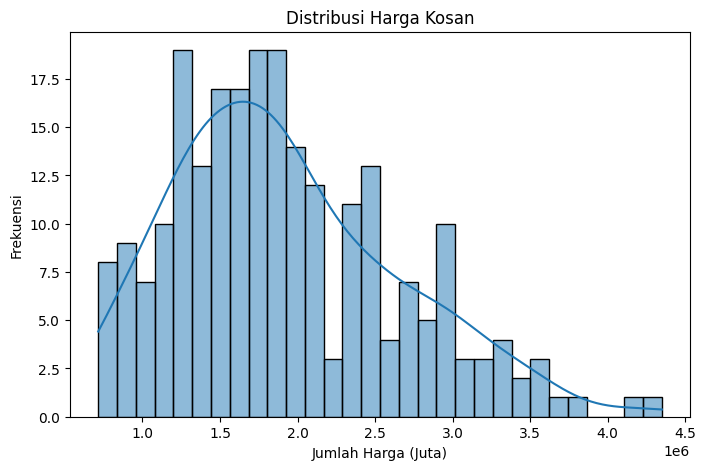

count    2.360000e+02
mean     1.919654e+06
std      7.273762e+05
min      7.150000e+05
25%      1.397500e+06
50%      1.801250e+06
75%      2.381250e+06
max      4.349000e+06
Name: harga, dtype: float64


In [28]:
plt.figure(figsize=(8,5))
sns.histplot(df['harga'], kde=True, bins=30)
plt.title("Distribusi Harga Kosan")
plt.xlabel("Jumlah Harga (Juta)")
plt.ylabel("Frekuensi")
plt.show()

print(df['harga'].describe())

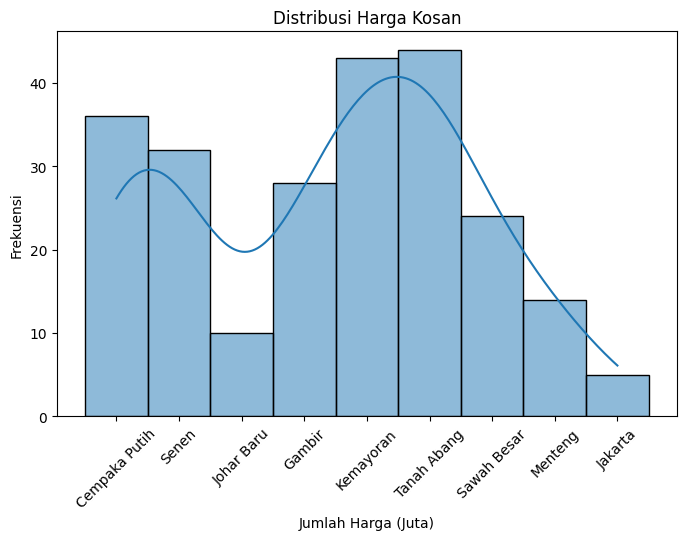

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(df['lokasi'], kde=True, bins=30)
plt.title("Distribusi Harga Kosan")
plt.xlabel("Jumlah Harga (Juta)")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
plt.show()


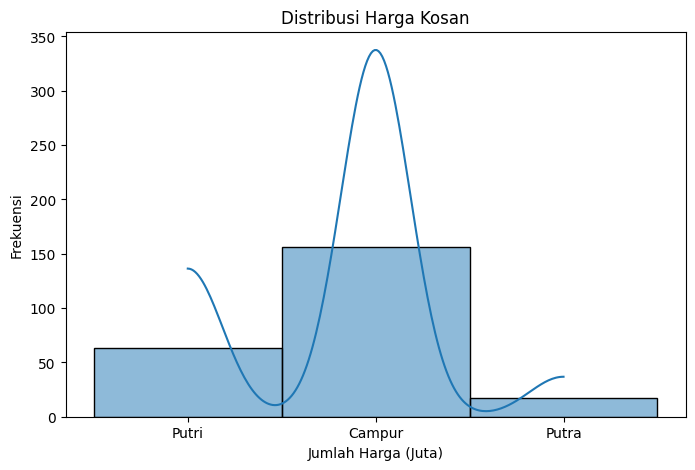

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(df['type_kosan'], kde=True, bins=30)
plt.title("Distribusi Harga Kosan")
plt.xlabel("Jumlah Harga (Juta)")
plt.ylabel("Frekuensi")
plt.show()

In [31]:
a = df['wifi'].value_counts()
b = df['ac'].value_counts()
c = df['kasur'].value_counts()
d = df['kamar_mandi_dalam'].value_counts()
e = df['kloset_duduk'].value_counts()
f = df['akses_24_jam'].value_counts()
f

akses_24_jam
Ada          179
Tidak Ada     57
Name: count, dtype: int64

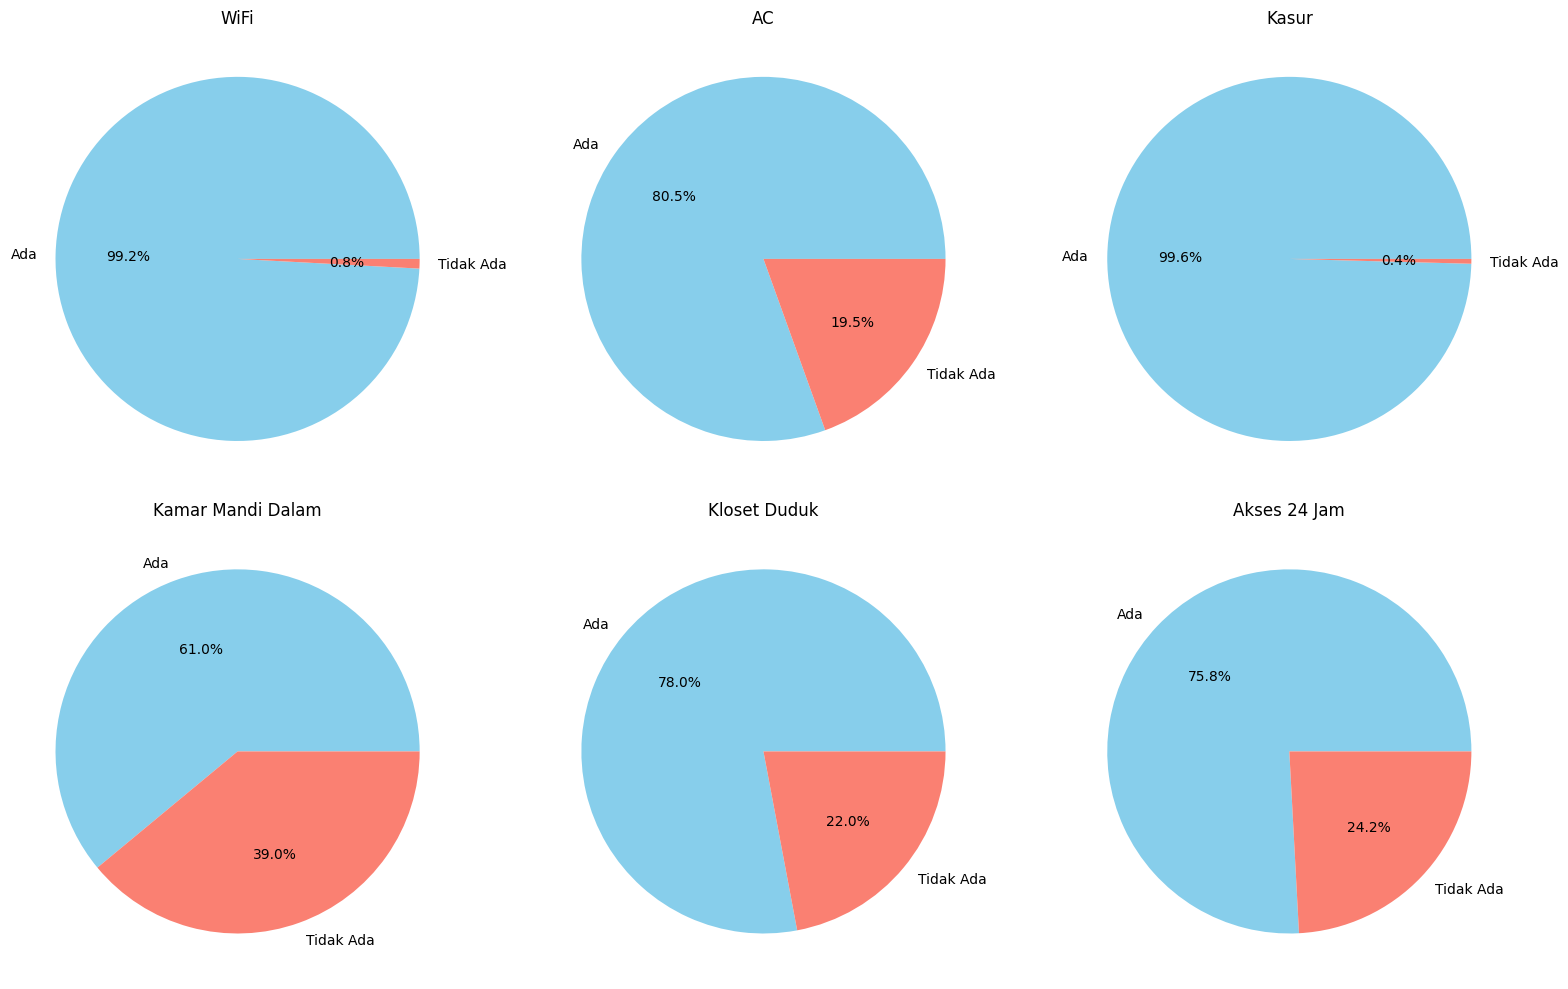

In [32]:
plt.figure(figsize=(16, 10))

# === 1. WiFi ===
plt.subplot(2, 3, 1)
plt.pie(a.values, labels=a.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('WiFi')

# === 2. AC ===
plt.subplot(2, 3, 2)
plt.pie(b.values, labels=b.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('AC')

# === 3. Kasur ===
plt.subplot(2, 3, 3)
plt.pie(c.values, labels=c.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Kasur')

# === 4. Kamar Mandi Dalam ===
plt.subplot(2, 3, 4)
plt.pie(d.values, labels=d.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Kamar Mandi Dalam')

# === 5. Kloset Duduk ===
plt.subplot(2, 3, 5)
plt.pie(e.values, labels=e.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Kloset Duduk')

# === 6. Akses 24 Jam ===
plt.subplot(2, 3, 6)
plt.pie(f.values, labels=f.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Akses 24 Jam')

plt.tight_layout()
plt.show()
